# Morris Method for Monopile Turbine
This file is set up to explore sensitivity for 4 inputs:
- FA stiffness at base
- SS stiffness at base
- Wave Height
- Wave Direction

In [1]:
# For testing with active control of the blade pitch
from SALib.sample.morris.morris import sample
import numpy as np

# Define the model inputs
# recall that our model takes input vectors of the form:

# [wind_direction,wind_speed,blade_angle,air_density,erosion_blade1_region1,..._region6,
# erosion_blade2_region1,...,_region6,erosion_blade3_region1,..._region6]

problem = {
    'num_vars': 4,
    'names': ['FAstif', 'SSstif','WaveHeight','WaveDir'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               ]
}

# N = number of trajectories to generate
N = 100;

# num_levels = number of partitions for the input dimensions
num_levels = 6;

# optimal trajectories
opt = 10;

# Generate samples
param_values = sample(problem, N, num_levels, opt)

# Save the outputs
np.savetxt("MorrisInputs.txt", param_values)

# Run this after Simulation
Do not re-run the above cell.

In [7]:
from SALib.analyze.morris import analyze
import pandas as pd
import numpy as np

problem = {
    'num_vars': 4,
    'names': ['FAstif', 'SSstif','WaveHeight','WaveDir'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               ]
}

inputs = np.loadtxt("MorrisInputs.txt", float)

# Load in the corresponding Morris results file
morris_exp_data = pd.read_table("",delimiter = ',')

In [54]:
allnames = morris_exp_data.columns.tolist()
for i in range(60):
    print(6*i,allnames[6*i:6*i+6])


0 ['Wind_Direction', 'Wind_Speed', 'Air_Density', 'BldPitch1', 'BldPitch2', 'BldPitch3']
6 ['LSShftFxa', 'LSShftFya', 'LSShftFza', 'LSShftMxa', 'LSSTipMya', 'LSSTipMza']
12 ['LSSGagMya', 'LSSGagMza', 'HSShftTq', 'HSShftPwr', 'LSSTipVxa', 'LSSGagVxa']
18 ['RootFxb1', 'RootFxb2', 'RootFxb3', 'RootFyb1', 'RootFyb2', 'RootFyb3']
24 ['RootFzc1', 'RootFzc2', 'RootFzc3', 'RootMxb1', 'RootMxb2', 'RootMxb3']
30 ['RootMyb1', 'RootMyb2', 'RootMyb3', 'RootMzc1', 'RootMzc2', 'RootMzc3']
36 ['TipDxc1', 'TipDxc2', 'TipDxc3', 'TipDyc1', 'TipDyc2', 'TipDyc3']
42 ['TipDzc1', 'TipDzc2', 'TipDzc3', 'TipDxb1', 'TipDxb2', 'TipDxb3']
48 ['TipDyb1', 'TipDyb2', 'TipDyb3', 'TipALxb1', 'TipALxb2', 'TipALxb3']
54 ['TipALyb1', 'TipALyb2', 'TipALyb3', 'TipALzb1', 'TipALzb2', 'TipALzb3']
60 ['TipRDxb1', 'TipRDxb2', 'TipRDxb3', 'TipRDyb1', 'TipRDyb2', 'TipRDyb3']
66 ['HSShftV', 'RotPwr', 'YawBrTDxt', 'YawBrTDyt', 'YawBrTDzt', 'YawBrFxn']
72 ['YawBrFyn', 'YawBrFzn', 'YawBrMxn', 'YawBrMyn', 'YawBrMzn', 'TwrBsFxt']
78 [

TipALyb1
                mu   mu_star     sigma  mu_star_conf
wind_dir  0.112220  0.173828  0.216333      0.046472
wind_spd -0.581620  0.581620  0.237828      0.071923
air_dens -0.042587  0.065264  0.074318      0.016656
er1      -0.022768  0.036248  0.052938      0.014122
er2       0.033255  0.035386  0.049302      0.015428
er3       0.027093  0.049505  0.086561      0.021220
er4       0.019264  0.052314  0.087840      0.021126
er5       0.001174  0.052289  0.137651      0.041218
er6       0.040763  0.079772  0.124608      0.031249
wind_spd
wind_dir
er6
er5
er4
er3


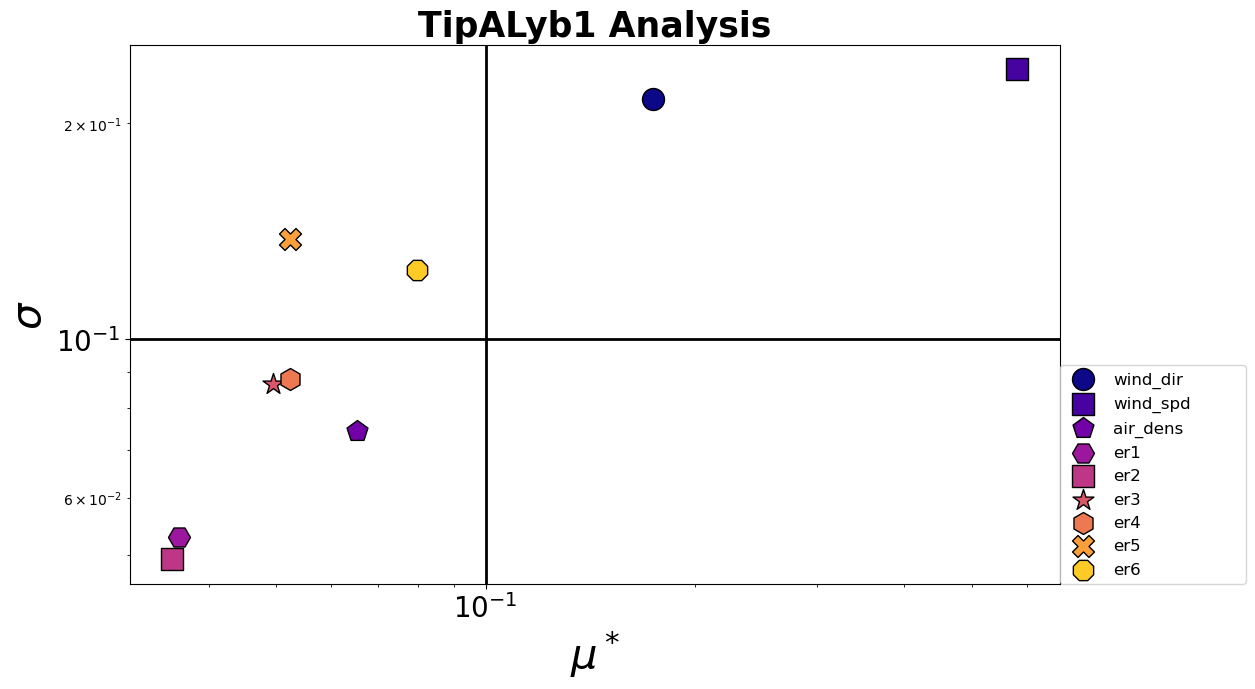

In [57]:
n = 54; 
# Output name
outname = allnames[n]
print(outname)
outputs = morris_exp_data[[allnames[n]]].to_numpy()

Si = analyze(problem, inputs, outputs, conf_level=0.95,
                    print_to_console=True, num_levels=4)

import matplotlib.pyplot as plt

# We want to plot the mu_star on the xaxis and the sigma on the y axis

# But first let's try something out...
stor = np.zeros((2,9))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((9,))

for i in range(9):
    vals[i] = np.linalg.norm(stor[:,i])
tempvals = vals
# List off the top 3 influential inputs...
for j in range(3):
    ind = np.argmax(tempvals)
    print(Si["names"][ind])
    tempvals[ind] = 0
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

stor = np.zeros((2,9))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((9,))
for i in range(9):
    vals[i] = np.linalg.norm(stor[:,i])

cmap = plt.cm.plasma
norm = plt.Normalize(vmin=0, vmax=9)
nomr1 = plt.Normalize(vmin=min(vals),vmax=max(vals))
plt.yscale("log")
plt.xscale("log")
ms = ["o","s","p","H","s","*","h","X","8","H","s","*","h","X","8","H","s","*","h","X","8"];
for i in range(len(Si["names"])):
    cl = cmap(norm(i))
    scale = 250 #400*nomr1(vals[i])
    ax.scatter(Si["mu_star"][i], Si["sigma"][i], marker = ms[i],color=cl, s=scale, label=Si["names"][i], edgecolors='black')
              
#ax.legend(loc="upper left")
ax.legend(bbox_to_anchor=(1,0,.2,2), loc='lower left',
           ncols=1,mode="expand", borderaxespad=0,fontsize=12)
ax.grid(True)
ax.set_xlabel("$\mu^*$",fontsize=30)
ax.set_ylabel("$\sigma$",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.grid(color='k', linewidth=2)
outname = outname+" Analysis"
ax.set_title(outname,fontsize = 25,fontweight = 'bold')
plt.show()